<a href="https://colab.research.google.com/github/Gus-1003/TADS_Projeto_PalmaS/blob/main/PrimeirosTestes/Teste1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Projeto PalmaS - Teste**


## Inicio: Importe de Bibliotecas, ferramentas e Drive:

In [6]:
from google.colab import drive

import math # Calculos de área e circunferencia
import numpy as np # Manipulação de matrizes
from scipy import stats # fornece ferramentas adicionais para computação de arrays e fornece estruturas de dados especializadas, como matrizes esparsas e árvores k-dimensional.

import pandas as pd # Manipulação de dados
import seaborn as sns #biblioteca de visualização de dados Python baseada em matplotlib.

from sklearn.cluster import KMeans # Criação de inteligencia artificial

import cv2 #OpenCV - Manipulação da Imagem
from google.colab.patches import cv2_imshow

In [7]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Parte 1: utilização do OpenCV:

### 1.1 - Separação dos canais em RGB

Fonte de Pesquisa:

*   Método copy: https://docs.python.org/3/library/copy.html
*   Método split (OpenCV):https://techtutorialsx.com/2020/03/02/python-opencv-splitting-image-channels/
*   Método hconcat (OpenCV):https://www.geeksforgeeks.org/concatenate-images-using-opencv-in-python/



Lembrando que: Ao realizar métodos do OpenCV como split, o openCV devolve os canais em ordem descrente.

(RGB -> BGR)

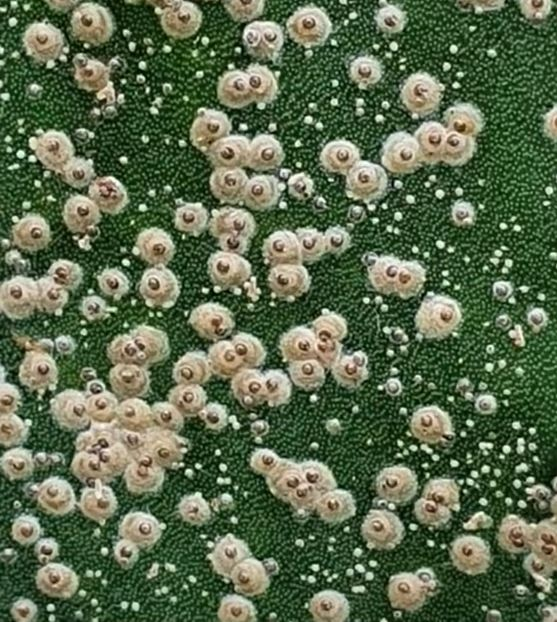

In [8]:
#im = cv2.imread("/content/drive/MyDrive/Colab_Bolsa/Objetivo_Projeto.jpg")
im = cv2.imread("/control_img_3[763].jpeg")
cv2_imshow(im) 

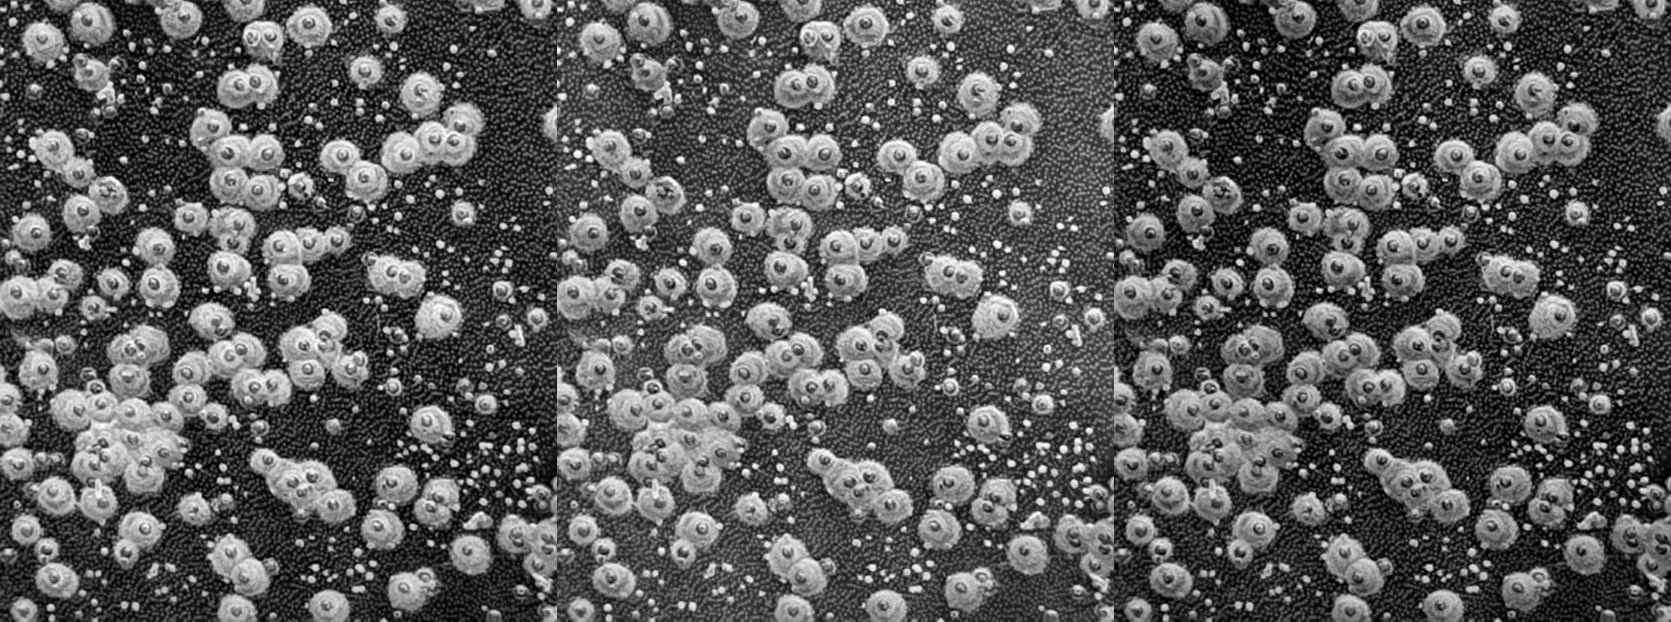

In [9]:
im_copy = im.copy() # Clona a Imagem original (Alterações no clone não afetam a imagem original);

# Teste 15 - Professor:
# Transformar em HSV
# Equalizar 
# Filtro de media

(B, G, R) = cv2.split(im) #Split = Método para a divisão da imagem nos 3 canais de intensidade
cv2_imshow(cv2.hconcat([R, G, B])) #hconcat = Concatena imagens Horizontalmente

**Concusão:**

*  Melhor canal: B - Blue

> O canal azul, entre os 3 canais de intensidade, demonstrou uma maior segmentação entre a cochonilha e a superficie da palma. Se tornando mais fácil a identificação da praga nessa confiduração.


*  Pior canal: G - Green

> No canal verde, temos uma suavização(clareamento) das cores tanto da superficie da palma como da cochonilha, provavelmente proveniente da colocaração natural da planta (que é esverdiada). Essa configuração dificulta a segmentação dos objetos.





### 1.2 - Redimensionar Imagem:

Método resize: https://java2blog.com/cv2-resize-python/#:~:text=You%20can%20use%20resize%20%28%29%20method%20of%20cv2,both%20the%20height%20and%20width%20of%20an%20image.

source: Imagem de origem/original/entrada ou seja, aquela matriz ndimensional de imagem que deseja ser redimensionada.

dim: Dimensão necessária de uma imagem na forma de tupla como (altura, largura).

fx: Fator de escala ao longo do eixo horizontal ou eixo X.

fy: Fator de escala ao longo do eixo vertical ou eixo Y.

In [10]:
def resize(im): #Função resize = Redimensiona a imagem de acordo com as dimensões relatadas(x,y)
  return cv2.resize(im, (0,0), fx=0.5, fy=0.5) 

### 1.3 - Binarização e Limiarização

Fonte da Pesquisa:

1.  threshold / Limiar da imagem: https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html

- cv2.THRESH_BINARY_INV = A função transforma uma imagem em escala de cinza em uma imagem binária

- cv2.THRESH_OTSU = Considere uma imagem com apenas dois valores de imagem distintos (imagem bimodal), onde o histograma consistiria apenas de dois picos. Um bom limiar estaria no meio desses dois valores. Da mesma forma, o método de Otsu determina um valor de limiar global ideal a partir do histograma de imagem.

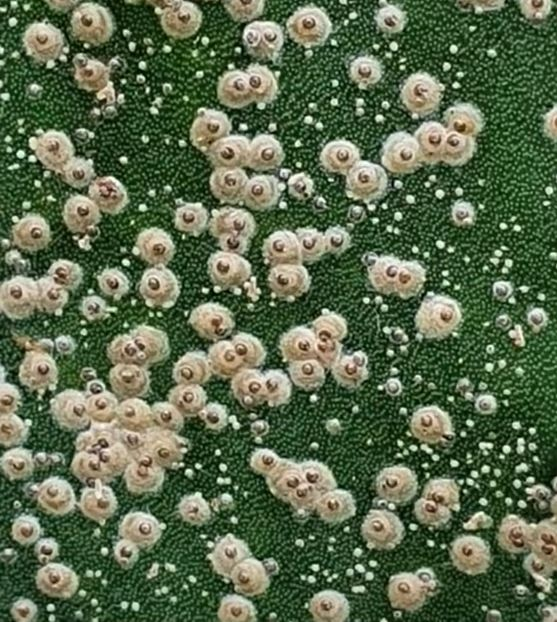

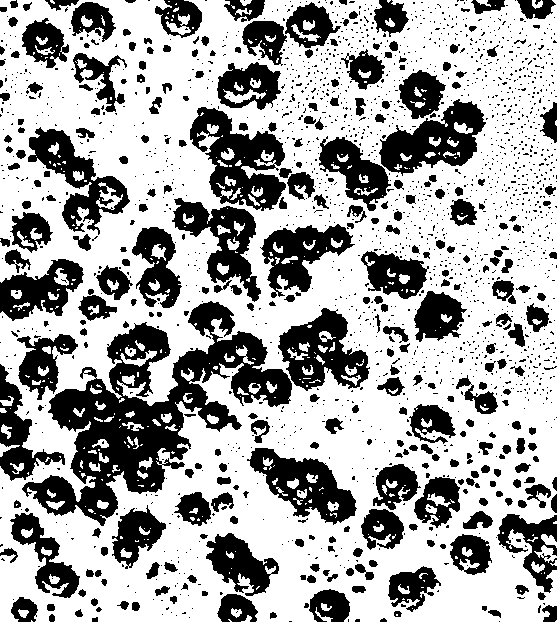

In [11]:
ret, thresh = cv2.threshold(B, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2_imshow(im)
cv2_imshow(thresh)

### 1.4 - Extração de dados da imagem a partir do Contorno:

Fonte da Pesquisa:

*   Contorno (OpenCV): https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html
*   Zeros (Numpy): https://numpy.org/doc/stable/reference/generated/numpy.zeros.html


In [12]:
def extract_image(im, cnt):
  # np.zeros: Cria uma matriz com determinadas dimensões
  im_blank = np.zeros(im.shape, np.uint8) 
  cv2.drawContours(im_blank, [cnt], -1, 255, -1)
  mask = im_blank == 255
  im_filter = im[mask]
  return im_filter

In [13]:
def try_or(im, mask, default=-1):
    try:
        return im[mask]
    except:
        return default

### 1.5 - Identificação dos Contornos:



Fontes de Pesquisa:

*  Estrutura List (cells) (Python_Básico): https://python-reference.readthedocs.io/en/latest/docs/list/
*  Método moments (OpenCV): https://docs.opencv.org/3.4/d0/d49/tutorial_moments.html

Moments significam a distribuição da matéria sobre um ponto ou um eixo. No OpenCV, os momentos são a média das intensidades dos pixels de uma imagem. Os momentos openCV são usados para descrever várias propriedades de uma imagem, como a intensidade de uma imagem, seu centroide, a área e informações sobre sua orientação.

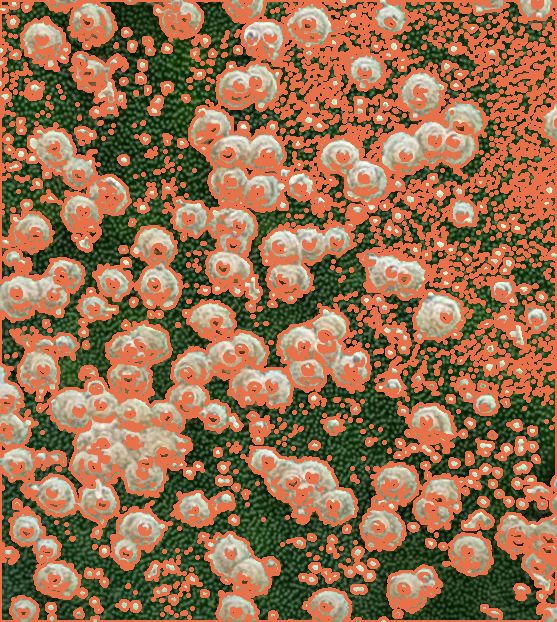

In [14]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cells = [] # Criação da lista de celulas

for cnt in contours:
  M = cv2.moments(cnt)
  x, y, width, height = cv2.boundingRect(cnt)
  rect = cv2.minAreaRect(cnt)
  circle = cv2.minEnclosingCircle(cnt)

  r = extract_image(R, cnt)
  g = extract_image(G, cnt)
  b = extract_image(B, cnt)

  cell = {
    #'area': cv2.contourArea(cnt),
    #'area_convex': ((math.pi * (circle[1]**2)) - cv2.contourArea(cnt)),
    #'area_perc': (cv2.contourArea(cnt)) / (math.pi * (circle[1]**2)),
    #'area_convex_perc': ((math.pi * (circle[1]**2)) - cv2.contourArea(cnt)) / (math.pi * (circle[1]**2)),
    #'perimeter': cv2.arcLength(cnt,True),
    #'width': width,
    #'height': height,
    #'angle': rect[2],
    #'radius': circle[1],

    'r_mean': np.mean(r) ,
    'r_max': np.max(r),
    'r_min': np.min(r),
    'r_std_dev': np.std(r),

    'g_mean': np.mean(g),
    'g_max': np.max(g),
    'g_min': np.min(g),
    'g_std_dev': np.std(g),

    'b_mean': np.mean(b),
    'b_max': np.max(b),
    'b_min': np.min(b),
    'b_std_dev': np.std(b)
  }

  cells.append(cell)

im = cv2.drawContours(im, contours, -1, (73, 113, 232), thickness=2)
cv2_imshow(im)

### 1.6 - Captura das primeiras Features (Criação do Dataframe - Pandas):

Fonte de Pesquisa:

*  Dataframe(Pandas): https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [15]:
df = pd.DataFrame(cells)
df.describe()

r_mean        r_max        r_min    r_std_dev       g_mean  \
count  2466.000000  2466.000000  2466.000000  2466.000000  2466.000000   
mean     98.309410    51.434307    59.017032    18.247655   119.193512   
std      19.857140    91.074322    38.714502    13.366412    16.108604   
min      63.833333  -128.000000  -128.000000     0.000000    67.850000   
25%      84.900000   -28.000000    51.000000    10.951878   111.223214   
50%      89.800000   103.000000    63.000000    14.816882   116.823077   
75%     109.481794   112.000000    74.000000    19.888071   123.375000   
max     169.754131   127.000000   127.000000    65.821427   173.153846   

             g_max        g_min    g_std_dev       b_mean        b_max  \
count  2466.000000  2466.000000  2466.000000  2466.000000  2466.000000   
mean    -46.900243    88.167478    18.161070    86.810221    77.879562   
std      99.049793    21.656041    13.309860    15.565729    58.901930   
min    -128.000000  -124.000000     0.000000    47.735632  -128.000000   
25%    -120.000000    79.000000    10.864621    79.200000    93.000000   
50%    -107.000000    92.000000    14.840654    83.222449    98.000000   
75%      -1.000000   102.000000    19.856460    88.406818   106.000000   
max     127.000000   127.000000    65.957198   145.525789   127.000000   

             b_min    b_std_dev  
count  2466.000000  2466.000000  
mean     55.998783    18.202286  
std      19.075818    13.416959  
min       0.000000     0.000000  
25%      46.000000    10.816890  
50%      58.000000    14.808686  
75%      68.000000    19.784472  
max      93.000000    66.066081

In [16]:
df.shape

(2466, 12)

## Parte 2: utilização do OpenCV + Kmeans:

Fonte de pesquisa base para a parte 2:

*  https://docs.opencv.org/3.4/d1/d5c/tutorial_py_kmeans_opencv.html

### 2.1 - Definicação da quantidade de Agrupamentos (Clusters):

In [17]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df) # Metodo fit

KMeans(n_clusters=4)

In [18]:
conts = [] #Lista de contornos

conts.append([])
conts.append([])
conts.append([])

for cont, cnt in enumerate(contours):
  cat = kmeans.predict([df.iloc[cont]])[0] #Método Predict
  conts[cat-1].append(cnt)

im = cv2.drawContours(im, conts[0], -1, (10, 113, 232), thickness=2)
im = cv2.drawContours(im, conts[2], -1, (82, 184, 10), thickness=2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/pytho

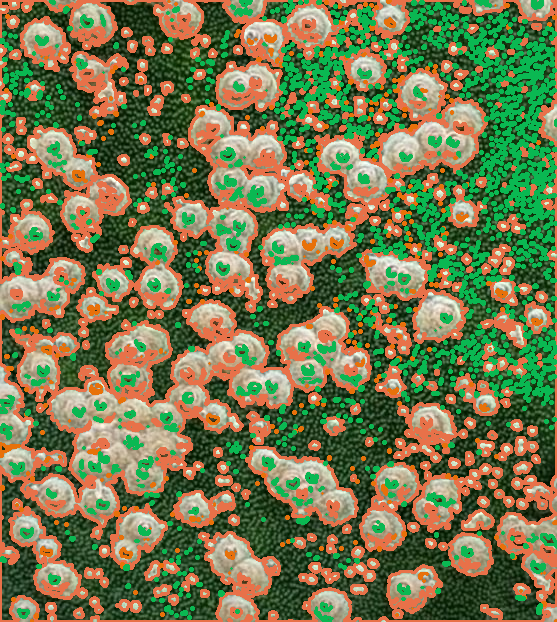

In [19]:
cv2_imshow(im)

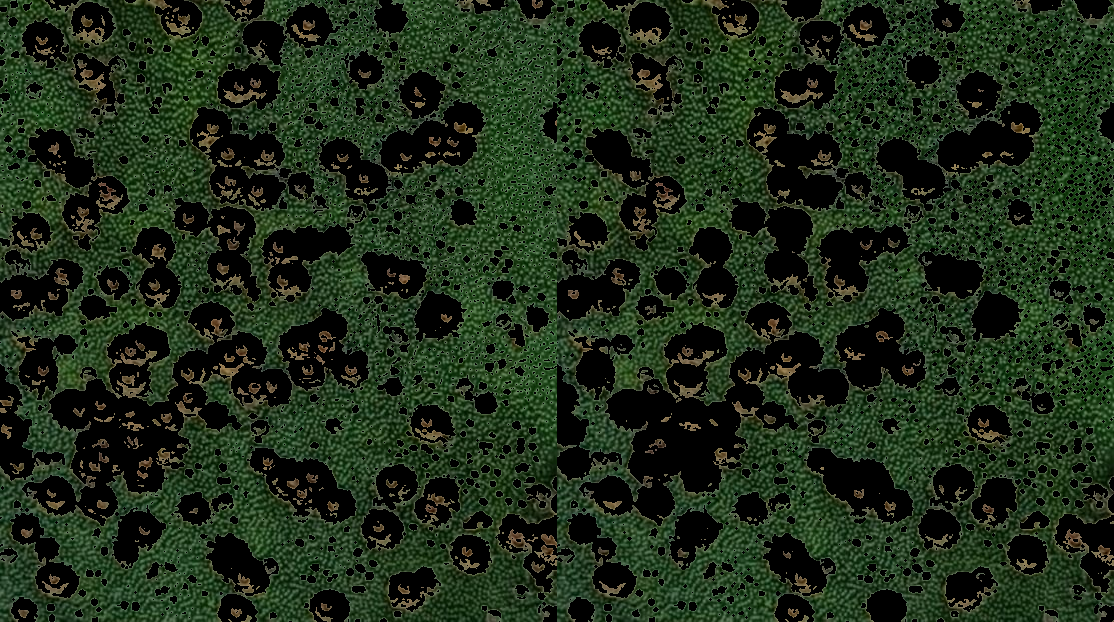

In [20]:
im_copy

t1 = cv2.drawContours(thresh.copy(), conts[0], -1, 0, thickness=cv2.FILLED)
t1 = cv2.drawContours(t1, conts[0], -1, 0, thickness=cv2.FILLED)
t1 = cv2.bitwise_and(im_copy, im_copy, t1, t1) 

t2 = cv2.drawContours(thresh.copy(), conts[0], -1, 0, thickness=cv2.FILLED)
t2 = cv2.drawContours(t2, conts[2], -1, 0, thickness=cv2.FILLED)
t2 = cv2.bitwise_and(im_copy, im_copy, t2, t2)

t3 = cv2.drawContours(thresh.copy(), conts[2], -1, 0, thickness=cv2.FILLED)
t3 = cv2.drawContours(t3, conts[2], -1, 0, thickness=cv2.FILLED)
t3 = cv2.bitwise_and(im_copy, im_copy, t3, t3)

cv2_imshow(cv2.hconcat([t1, t3])) # A t1 é a unica que possui cor

### 2.2 - Criação de Borda e Limiarização:


Fontes de pesquisa:

*  Método copyMakeBorder(OpenCV): https://www.geeksforgeeks.org/python-opencv-cv2-copymakeborder-method/#:~:text=OpenCV-Python%20is%20a%20library%20of%20Python%20bindings%20designed,cv2.copyMakeBorder%20%28src%2C%20top%2C%20bottom%2C%20left%2C%20right%2C%20borderType%2C%20value%29



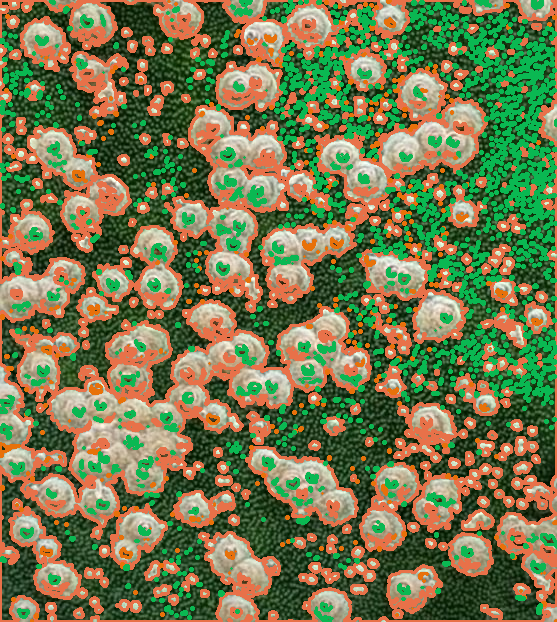

In [21]:
im_gray = im
t1 = cv2.drawContours(thresh.copy(), conts[1], -1, 255, thickness=cv2.FILLED)
t1 = cv2.drawContours(t1.copy(), conts[2], -1, 255, thickness=cv2.FILLED)
t1 = cv2.bitwise_not(t1)
t1 = cv2.bitwise_and(im_gray, im_gray, t1, t1)

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(im, str(conts[0]) + ' cells', (600,450), font, 3, (0, 255, 0), 2, cv2.LINE_AA)

t2 = cv2.drawContours(thresh.copy(), conts[0], -1, 255, thickness=cv2.FILLED)
t2 = cv2.drawContours(t2.copy(), conts[2], -1, 255, thickness=cv2.FILLED)
t2 = cv2.bitwise_not(t2)
t2 = cv2.bitwise_and(im_gray, im_gray, t2, t2)

t3 = cv2.drawContours(thresh.copy(), conts[0], -1, 255, thickness=cv2.FILLED)
t3 = cv2.drawContours(t3.copy(), conts[1], -1, 255, thickness=cv2.FILLED)
t3 = cv2.bitwise_not(t3)
t3 = cv2.bitwise_and(im_gray, im_gray, t3, t3)

cv2_imshow(im_gray)

In [22]:
# cv2.copyMakeBorder() método é usado para criar uma borda em torno da imagem como um quadro de fotos.
#im_gray = cv2.copyMakeBorder(im_gray, 1,1,1,1, cv2.BORDER_CONSTANT, value=0)
im_gray = cv2.cvtColor(im_gray, cv2.COLOR_BGR2GRAY)
# Binarização automática (OTSU)
ret, thresh = cv2.threshold(im_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#cv2_imshow(im_gray)


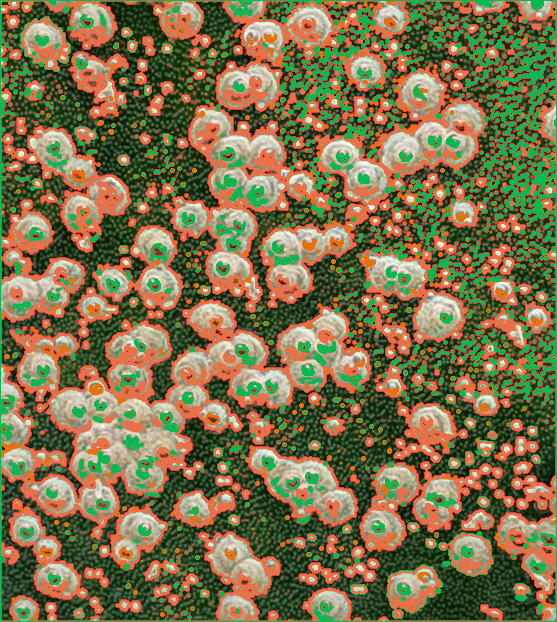

In [23]:
#Pegando os contornos, suas características e desenhando na imagem
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


cells = []
cnts = []

cnt1 = []
cnt2 = []
for cnt in contours:
  M = cv2.moments(cnt)
  x, y, width, height = cv2.boundingRect(cnt)
  rect = cv2.minAreaRect(cnt)
  circle = cv2.minEnclosingCircle(cnt)


  im_blank = np.zeros(im_gray.shape, np.uint8)
  cv2.drawContours(im_blank, [cnt], -1, (255, 255, 255), -1)
  mask = im_blank == 255
  im_filter = im_gray[mask]

  cell = {
    'centroid': [int(M['m10']/(M['m00']+0.0000001)), int(M['m01']/(M['m00']+0.0000001))], #[x, y]
    'area': cv2.contourArea(cnt),
    'area_convex': ((math.pi * (circle[1]**2)) - cv2.contourArea(cnt)),
    'area_perc': (cv2.contourArea(cnt)) / (math.pi * (circle[1]**2)),
    'area_convex_perc': ((math.pi * (circle[1]**2)) - cv2.contourArea(cnt)) / (math.pi * (circle[1]**2)),
    'perimeter': cv2.arcLength(cnt,True),
    'boundingBox': [x, y, x+width, y+height],
    'width': width,
    'height': height,
    'angle': rect[2],
    'radius': circle[1], #Raio do menor círculo que cabe o objeto
    'mean': np.mean(im_gray[mask]),
    'max': np.max(im_gray[mask]),
    'min': np.min(im_gray[mask]),
    'std_dev': np.std(im_gray[mask]),
    'mode': stats.mode(im_gray[mask], axis = None),    
  }

  cell2 = {
    'area': cv2.contourArea(cnt),
    'area_convex': ((math.pi * (circle[1]**2)) - cv2.contourArea(cnt)),
    'area_perc': (cv2.contourArea(cnt)) / (math.pi * (circle[1]**2)),
    'area_convex_perc': ((math.pi * (circle[1]**2)) - cv2.contourArea(cnt)) / (math.pi * (circle[1]**2)),
    'perimeter': cv2.arcLength(cnt,True),
    'width': width,
    'height': height,
    'angle': rect[2],
    'radius': circle[1], #Raio do menor círculo que cabe o objeto
    'mean': np.mean(im_gray[mask]),
    'max': np.max(im_gray[mask]),
    'min': np.min(im_gray[mask]),
    'std_dev': np.std(im_gray[mask]),
  }

  if(cell['area']<20000):
    cells.append(cell2)
    cnts.append(cnt)
    
  if(cell['area']>40):
    cnt1.append(cnt)
  if(cell['area_convex_perc']>0.4):
    cnt2.append(cnt)

im_contours = cv2.drawContours(im, cnts, -1, (10, 113, 232), 1)
im_contours = cv2.drawContours(im, cnt1, -1, (82, 184, 10), 1)
im_contours = cv2.drawContours(im, cnt2, -1, (62, 62, 224), 1)

cv2_imshow(im_contours)

## Parte 3: Analise dos Resultados Alcaçados na utilização OpenCV + Kmeans

### 3.1 - Informações Organizadas em formato dataframe:

In [24]:
df = pd.DataFrame(cells)
df

area   area_convex  area_perc  area_convex_perc  perimeter  width  \
0      2.0  1.142221e+00   0.636492          0.363508   5.656854      3   
1      2.0  1.142221e+00   0.636492          0.363508   5.656854      3   
2      2.0  1.142221e+00   0.636492          0.363508   5.656854      3   
3      2.0  1.142221e+00   0.636492          0.363508   5.656854      3   
4     17.0  1.136312e+01   0.599370          0.400630  16.485281      7   
...    ...           ...        ...               ...        ...    ...   
2099   0.0  3.141592e-08   0.000000          1.000000   0.000000      1   
2100   0.0  3.141592e-08   0.000000          1.000000   0.000000      1   
2101   0.0  3.141592e-08   0.000000          1.000000   0.000000      1   
2102   0.0  3.141592e-08   0.000000          1.000000   0.000000      1   
2103  26.0  1.562839e+01   0.624574          0.375426  19.656854      8   

      height  angle    radius    mean  max  min    std_dev  
0          3  -45.0  1.000100  115.20  120   96   9.600000  
1          3  -45.0  1.000100  104.40  120   42  31.200000  
2          3  -45.0  1.000100  135.40 -112  101  17.200000  
3          3  -45.0  1.000100  128.40 -112   66  31.200000  
4          5    0.0  3.004707   97.24  120   62  25.813609  
...      ...    ...       ...     ...  ...  ...        ...  
2099       1    0.0  0.000100  109.00  109  109   0.000000  
2100       1    0.0  0.000100  105.00  105  105   0.000000  
2101       1    0.0  0.000100  106.00  106  106   0.000000  
2102       1    0.0  0.000100  103.00  103  103   0.000000  
2103       5   -0.0  3.640155   89.25 -112   24  54.934999  

[2104 rows x 13 columns]

In [25]:
df.columns

Index(['area', 'area_convex', 'area_perc', 'area_convex_perc', 'perimeter',
       'width', 'height', 'angle', 'radius', 'mean', 'max', 'min', 'std_dev'],
      dtype='object')

### 3.2 - Pre-Processamento do dataframe final:

In [26]:
df.describe()

area   area_convex    area_perc  area_convex_perc    perimeter  \
count  2104.000000  2.104000e+03  2104.000000       2104.000000  2104.000000   
mean     39.496911  8.347109e+01     0.328156          0.671844    15.517297   
std     298.084492  8.051778e+02     0.302080          0.302080    64.394473   
min       0.000000  3.141592e-08     0.000000          0.108812     0.000000   
25%       0.000000  3.141592e-08     0.000000          0.363508     0.000000   
50%       2.000000  1.142221e+00     0.330231          0.669769     5.656854   
75%       9.500000  4.853062e+00     0.636492          1.000000    12.485281   
max    6422.000000  1.954799e+04     0.891188          1.000000  1425.349409   

             width       height        angle       radius         mean  \
count  2104.000000  2104.000000  2104.000000  2104.000000  2104.000000   
mean      4.856464     4.399240   -16.620606     2.247939   109.193202   
std      10.332942     8.346247    39.166507     5.839941    13.189503   
min       1.000000     1.000000   -90.000000     0.000100    70.571429   
25%       1.000000     1.000000   -45.000000     0.000100   103.500000   
50%       3.000000     3.000000     0.000000     1.000100   107.000000   
75%       5.000000     5.000000     0.000000     2.236168   113.000000   
max     175.000000   114.000000    90.000000    87.067253   159.826816   

               max          min      std_dev  
count  2104.000000  2104.000000  2104.000000  
mean     43.622624    75.673004    15.122613  
std     100.965351    46.281833    17.326089  
min    -119.000000  -119.000000     0.000000  
25%    -112.000000    43.000000     0.000000  
50%     106.000000   102.000000     3.695617  
75%     114.000000   105.000000    31.983698  
max     124.000000   123.000000    58.807854

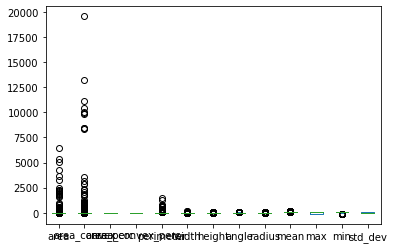

In [27]:
df.plot(kind = 'box') 

## Parte 4: Nova Aplicação do KMeans

In [28]:
kmeans = KMeans(n_clusters=3)

In [29]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [30]:
list(cells[0].values())

[2.0,
 1.1422211078096214,
 0.6364924463874407,
 0.36350755361255926,
 5.656854152679443,
 3,
 3,
 -45.0,
 1.000100016593933,
 115.2,
 120,
 96,
 9.6]

In [31]:
conts = []

conts.append([])
conts.append([])
conts.append([])

for cont, cnt in enumerate(cnts):
  cat = kmeans.predict([df.iloc[cont]])[0]
  conts[cat-1].append(cnt)

im = cv2.imread("/content/drive/MyDrive/Colab_Bolsa/Objetivo_Projeto.jpg")
im = cv2.cvtColor(im_gray, cv2.COLOR_GRAY2BGR)
thresh = cv2.drawContours(thresh, conts[0], -1, 255, thickness=cv2.FILLED)

#im = cv2.drawContours(im, conts[0], -1, (10, 113, 232), 1)
#im = cv2.drawContours(im, conts[1], -1, (82, 184, 10), 1)
#im = cv2.drawContours(im, conts[2], -1, (62, 62, 224), 1)

im = cv2.drawContours(im, conts[0], -1, (10, 113, 232), thickness=cv2.FILLED)
im = cv2.drawContours(im, conts[1], -1, (82, 184, 10), thickness=cv2.FILLED)
im = cv2.drawContours(im, conts[2], -1, (62, 62, 224), thickness=cv2.FILLED)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/pytho

In [34]:
im_gray = im
t1 = cv2.drawContours(thresh.copy(), conts[1], -1, 255, thickness=cv2.FILLED)
t1 = cv2.drawContours(t1.copy(), conts[2], -1, 255, thickness=cv2.FILLED)
t1 = cv2.bitwise_not(t1)
#t1 = cv2.bitwise_and(im_gray, t1, t1)

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(im, str(conts[0]) + ' cells', (600,450), font, 3, (0, 255, 0), 2, cv2.LINE_AA)

t2 = cv2.drawContours(thresh.copy(), conts[0], -1, 255, thickness=cv2.FILLED)
t2 = cv2.drawContours(t2.copy(), conts[2], -1, 255, thickness=cv2.FILLED)
t2 = cv2.bitwise_not(t2)
#t2 = cv2.bitwise_and(im_gray, t2, t2)

t3 = cv2.drawContours(thresh.copy(), conts[0], -1, 255, thickness=cv2.FILLED)
t3 = cv2.drawContours(t3.copy(), conts[1], -1, 255, thickness=cv2.FILLED)
t3 = cv2.bitwise_not(t3)
#t3 = cv2.bitwise_and(im_gray, t3, t3)

In [ ]:
t1.shape

### 4.1 - Apresentação dos Resultados:

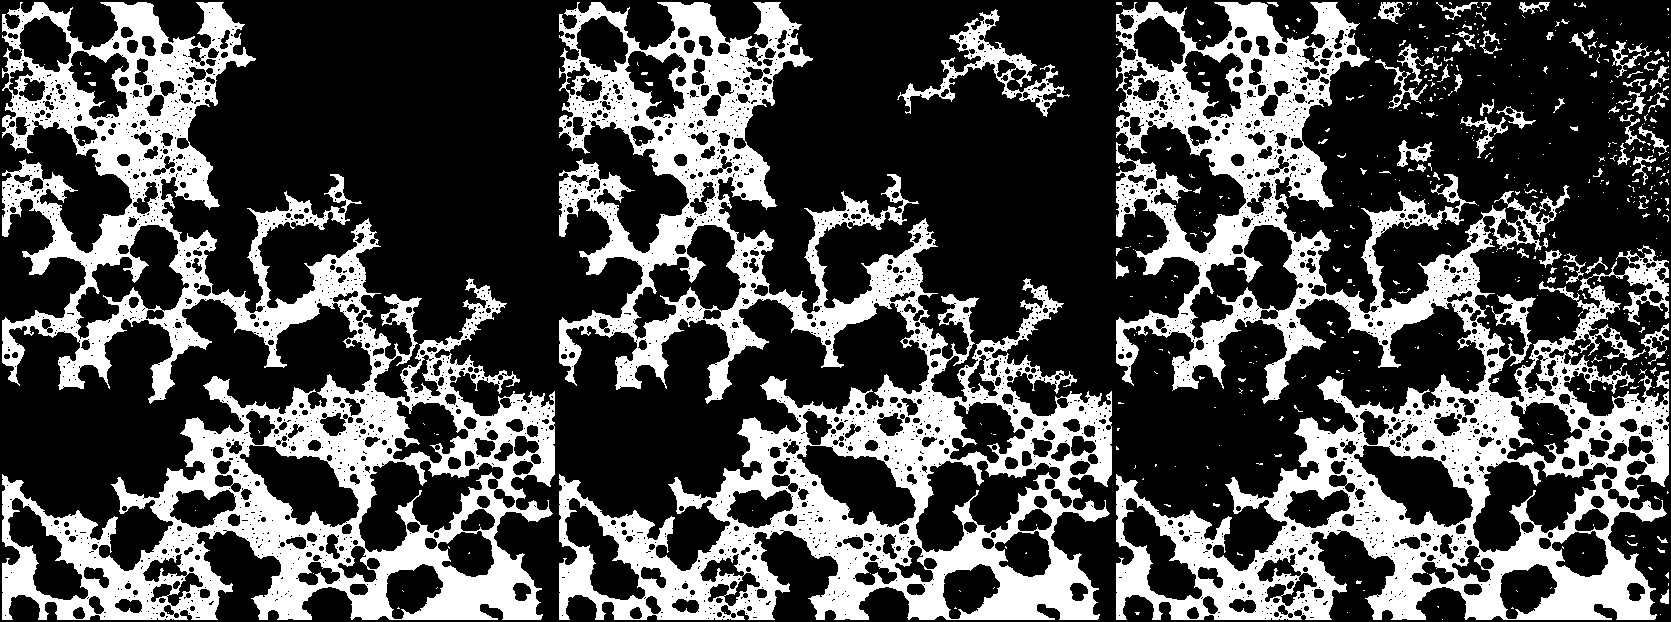

In [35]:
cv2_imshow(cv2.hconcat([t1, t2, t3]))

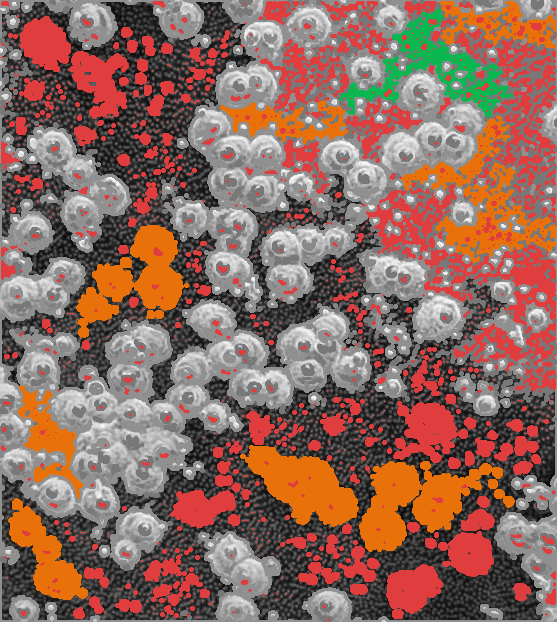

In [36]:
cv2_imshow(im)

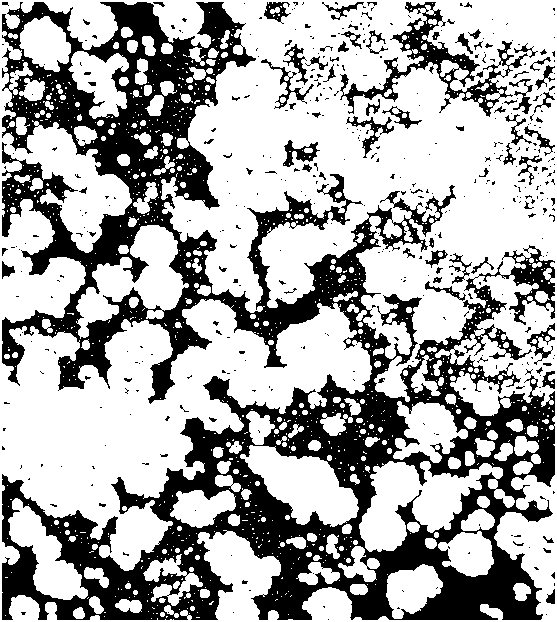

In [37]:
cv2_imshow(thresh)